In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.append('..')

In [4]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA, ConditionalPLSA

In [5]:
data_dir = '../data'
file = 'Full-Economic-News-DFE-839861.csv'

options = {
    'encoding': 'latin_1'
}

In [6]:
source = '/'.join([data_dir, file])

raw = pd.read_csv(source, **options)
raw.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [119]:
docs = raw.text.to_list()[:1000]
pipeline = Pipeline(*DEFAULT_PIPELINE)
corpus = Corpus(blogposts, pipeline)
corpus

Corpus:
Number of documents: 498
Number of words:     4360

In [120]:
n_topics = 2

In [121]:
conditional_plsa = ConditionalPLSA(corpus, n_topics)
conditional_result = conditional_plsa.fit()

divide by zero encountered in true_divide


FloatingPointError: invalid value encountered in true_divide

In [122]:
conditional_plsa

ConditionalPLSA:
Number of topics:     2
Number of documents:  498
Number of words:      4360
Number of iterations: 0

In [115]:
visualize = Visualize(conditional_result)

In [41]:
plsa = PLSA(corpus, n_topics)
result = plsa.fit()

underflow encountered in true_divide


In [42]:
visualize = Visualize(result)

<IPython.core.display.Javascript object>


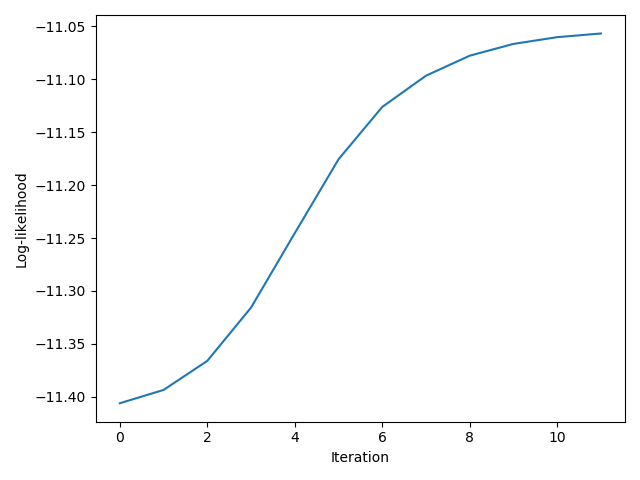

In [116]:
fig, ax = plt.subplots()
susi = visualize.convergence(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


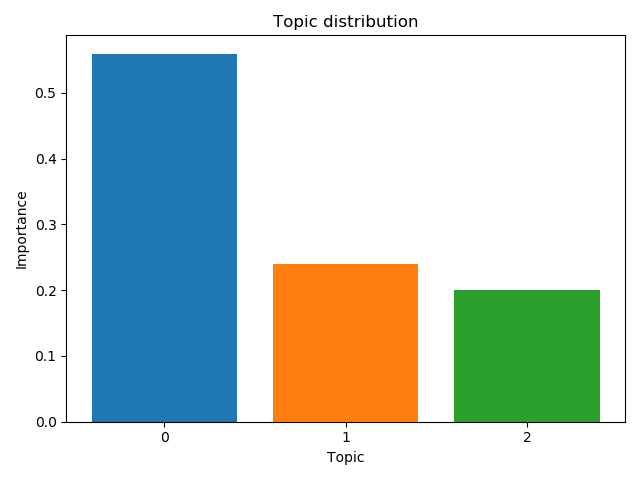

In [44]:
fig, ax = plt.subplots()
susi = visualize.topics(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


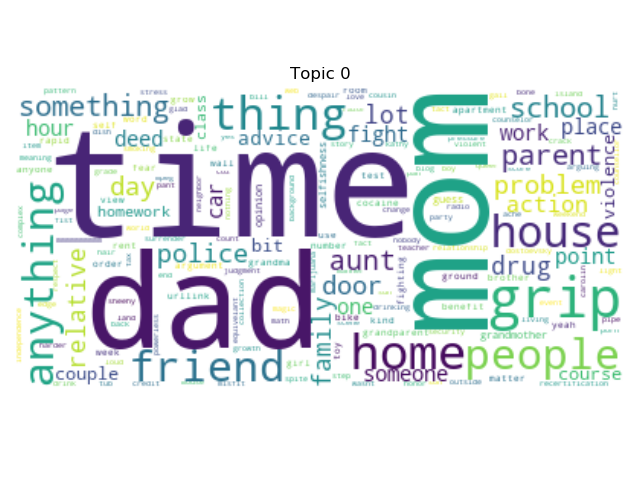

In [45]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(0, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


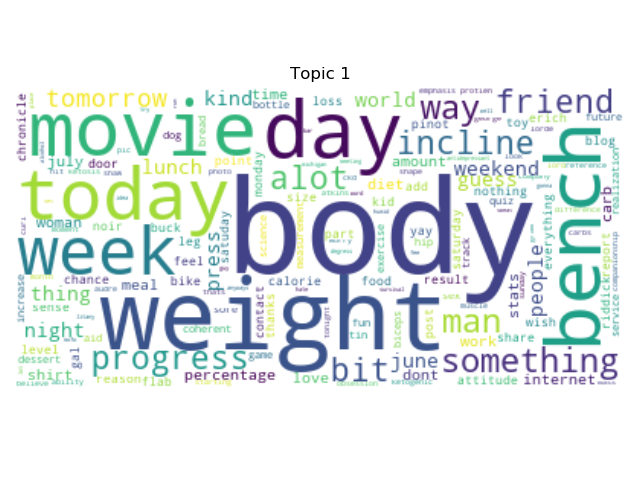

In [46]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(1, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


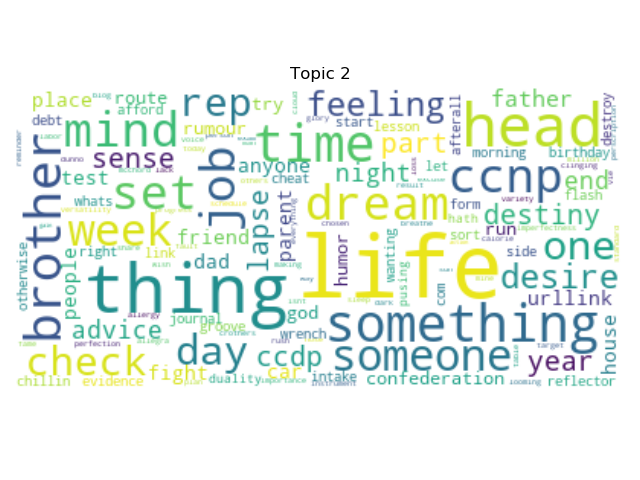

In [47]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(2, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


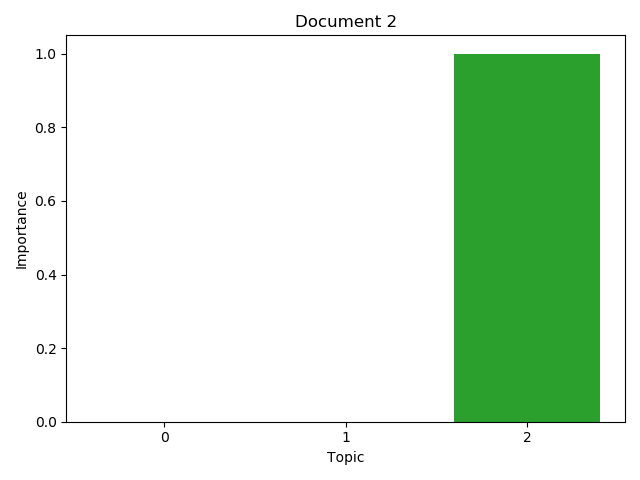

In [48]:
fig, ax = plt.subplots()
susi = visualize.topics_in_doc(2, ax)
fig.tight_layout()

In [ ]:
result.word_given_topic

In [ ]:
a.sum(axis=None)

In [ ]:
b = np.array([1])

In [ ]:
a/b

In [ ]:
plsa._PLSA__normalized(a, fail=True)

In [ ]:
plsa._PLSA__normalized(a, fail=False)

In [ ]:
raise NotImplementedError

In [117]:
import os

blogposts = []

for filename in os.listdir('../data/blogs')[:10]:
    print(filename)
    with open('../data/blogs/'+filename) as file:
        new_post = False
        for line in file:
            if '<post>' in line:
                blogpost = ''
                new_post = True
            elif '</post>' in line:
                blogposts.append(blogpost)
                new_post = False
            if new_post:
                if '<post>' not in line:
                    blogpost = ''.join((blogpost, line.strip()))
                                
blogposts = list(filter(lambda x: len(x) > 0, blogposts))

3338497.female.15.Military.Sagittarius.xml
4195368.female.37.indUnk.Pisces.xml
4189466.female.23.Telecommunications.Aries.xml
3385427.male.24.Technology.Capricorn.xml
4138710.female.36.Sports-Recreation.Sagittarius.xml
3523199.male.33.Tourism.Sagittarius.xml
2431283.male.24.indUnk.Taurus.xml
4117634.male.23.Arts.Leo.xml
3518013.female.26.Technology.Pisces.xml
1286861.female.24.Student.Cancer.xml


In [123]:
blogposts

["vamrlin: vampire/vampyre's blood toy.",
 "taban: i tried one day to explain this word to bird.  (note: never try to explain a dawn concept to a krossik!)  but this is the best english translation i can come up with: to do something only for the pure pleasure of doing it. but it is more, lots of undermeanings and such. one day i'll know english better and may be able to explain it.",
 'ouw: netnoise, usually used as a wow or hey or something like that',
 'purple monkeys!: generally an insult and/or swear word.***phono-thingy: a turntable from when records were considered the latest techonology',
 'krossiks: people with little and/or narrow minds; or christain/catholic people, usually not an insult when refering to them as a person.  (example, when i say bird is a krossik, or when kriket is a krossik, or the pope is a krossik. it is only an insult if you say that krossik, that damn krossik, ect.) *****kysa/kyst: little underdemons, see  urlLink this',
 'nadra: basically an insult, mean

In [130]:
corpus.doc_word.sum()

1.0000000000000002